<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - In-class Exam



---
#### Guidelines 
- This is your notebook for your in-class midterm exam. 
- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, if you do, your answers will be considered invalid = **0%**).
- The in-class exam is **10%** of your total midterm score.
- During the exam you can only have the following websites open in your browser:
    * [ECON-628-01 github][1]
    * ECON-628-01-yourgithubusersname 
    * [StackOverflow][2]  
- If we noticed that your computer browser has other websites open, you will be asked to **close your computer, leave the class, and will get an score of 0%**
- Remember: if you are using code from someone else/online (StackOverflow) you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
    


- Once you are done with your exam use this [link][3] to **submit** the GitHub link to your take home exam.
[1]:https://github.com/jrcmalunay/ECON628-01 "ECON-628-01 github"
[2]:http://stackoverflow.com "StackOverflow"
[3]: https://docs.google.com/forms/d/e/1FAIpQLSercXrXIky91taz98tPviIqA8C0FaQZ_WIfNoRYxMbV5wPtkg/viewform "link"

---



### Dataset 
This dataset comes from the Sleep and the allocation of time [paper][1] by Biddle, Jeff and Hamermesh, Daniel where using aggregated data for 12 countries, a cross section of microeconomic data, and a panel of households, they demonstrate that increases in time in the labor market reduce sleep!!!! The variables are:
https://www.jstor.org/stable/2937618?seq=1#page_scan_tab_contents

| **Name**   |      **Description**     |  
|----------|:-------------:|
| age | in years | 
| black | =1 if black | 
| case | identifier | 
| clerical | =1 if clerical worker |
| construc | =1 if construction worker |
| educ | years of schooling|
| earns74 | total earnings, 1974 |
| gdhlth | =1 if in good or excellent health |
| inlf |  =1 if in labor force |
|leis1  |sleep - totwrk|
|leis2  |slpnaps - totwrk|
|leis3  |rlxall - totwrk|
| smsa |  =1 if living in SMSA |
| | SMSA is the Standard Metropolitan Statistical Area, an integrated economic and social unit having a large population nucleus. It is a good indicator of living in a city.|
|lhrwage| log hourly wage|
|lothinc | log othinc, unless othinc < 0
| male |  =1 if male |
| marr | =1 if married |
| prot | =1 if Protestant |
|rlxall |slpnaps + personal activs|
| selfe  | =1 if self employed|
| sleep | minutes sleep at night, per week |
| slpnaps | minutes sleep, including naps, per week |
| south |  =1 if live in south |
| spsepay |  spousal wage income |
| spwrk75 |  =1 if spouse works |
| totwrk | minutes worked per week |
| union |  =1 if belong to union |
| worknrm | minutes work main job |
| workscnd | minutes work second job |
|exper     | age - educ - 6 |
| yngkid | =1 if children less than 3 years present |
| yrsmarr | years married |
| hrwage | hourly wage |
|agesq   |age^2|


[1]:https://core.ac.uk/download/pdf/6820141.pdf "paper"


---


---

## The Scenario
---
The PI (principal investigator) of a project you are working for, claims that nowadays people sleep "more" because access to the internet and the mechanization of labor reduces their work time. Based on this assumption, he wants to implement a literacy program that requires participants to read 1 chapter of a book one hour before their bed time and one section of an introduction to mathematics book one hour before they leave their home for work.

**He asks you to find out if people are indeed sleeping more or not, before he implements the literacy program.** 
Assume that, you don't have any other dataset but the one from the Biddle and Hamermesh paper to answer this question. 
Use all the predictive methods, you consider neccesary to give  an answer to the PI, and make sure you explain the output of your predictive analysis.


---

### Basic package imports
---

In [5]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Read/load the dataset "sleep_bh.csv" and do an initial overview of the data
    Check the shape of your data
    Cheeck the type of values
    Identify which variables have missing values
    Print a list of the indices where there are missing values
---

In [26]:
#Loading the data frame 
JJ = pd.read_csv('/Users/jjonoja/Desktop/ECON628-01-jjonoja/datasets/sleep/sleep_bh.csv')

In [27]:
#The first 5 observations in the data is browsed to see features
JJ.head(5)

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.0,0.0,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096


In [28]:
#Data shape shows column info. All Codes used in data cleaning process have been obtained from the class notes
JJ.shape   ##shows the data frame has 706 rows and 34 columns

(706, 34)

In [29]:
#The last 5 observations in the data is browsed to see features

JJ.tail(5)

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916
705,30,0,706,0.182331,0.030075,16,6750,1,0,4747,...,0,2363,0,2363,0,8,1,9,NaN,900


In [30]:
#Descriptive stat is obtained for the frame
JJ.describe()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,...,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,532.000000,706.000000
mean,38.815864,0.049575,353.500000,0.182331,0.030075,12.780453,9767.705382,0.890935,0.753541,4690.723796,...,0.480170,2122.920680,0.218130,2093.252125,29.668555,20.035411,0.128895,11.769122,5.082839,1635.144476
std,11.342637,0.217219,203.948932,0.335413,0.148366,2.784702,9323.588151,0.311942,0.431254,908.049561,...,0.499961,947.470123,0.413269,945.301457,148.834262,12.377520,0.335321,11.591227,3.704385,950.102976
min,23.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1745.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350000,529.000000
25%,29.000000,0.000000,177.250000,0.000000,0.000000,12.000000,2500.000000,1.000000,1.000000,4109.750000,...,0.000000,1553.500000,0.000000,1538.000000,0.000000,10.000000,0.000000,0.000000,2.890001,841.000000
50%,36.000000,0.000000,353.500000,0.000000,0.000000,12.000000,8250.000000,1.000000,1.000000,4620.000000,...,0.000000,2288.000000,0.000000,2275.000000,0.000000,17.000000,0.000000,9.000000,4.379999,1296.000000
75%,48.000000,0.000000,529.750000,0.182331,0.030075,16.000000,13750.000000,1.000000,1.000000,5203.750000,...,1.000000,2691.750000,0.000000,2635.500000,0.000000,30.000000,0.000000,20.000000,6.210001,2304.000000
max,65.000000,1.000000,706.000000,1.000000,1.000000,17.000000,42500.000000,1.000000,1.000000,7417.000000,...,1.000000,6415.000000,1.000000,6415.000000,1337.000000,55.000000,1.000000,43.000000,35.509987,4225.000000


## 2. Drop missing values (not the best practice), but OK for exam 
    Once you drop the missing values, check that the list of binary variables have values of 1 an 0
        Note: at this point the inlf predictor/variable should have the value of 1
---

In [31]:
#Checking for missing obervations
print JJ.isnull().sum()

age           0
black         0
case          0
clerical      0
construc      0
educ          0
earns74       0
gdhlth        0
inlf          0
leis1         0
leis2         0
leis3         0
smsa          0
lhrwage     174
lothinc       0
male          0
marr          0
prot          0
rlxall        0
selfe         0
sleep         0
slpnaps       0
south         0
spsepay       0
spwrk75       0
totwrk        0
union         0
worknrm       0
workscnd      0
exper         0
yngkid        0
yrsmarr       0
hrwage      174
agesq         0
dtype: int64


In [32]:
JJ.lhrwage = sleep.lhrwage.fillna(0)


In [33]:
JJ.loc[sleep['lhrwage'].isnull()]


,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq


In [ ]:
#The missing values seen can be dropped as follows: Source: Class note book


## 3. Check for correlations
    Implement a correlation heatmap
---

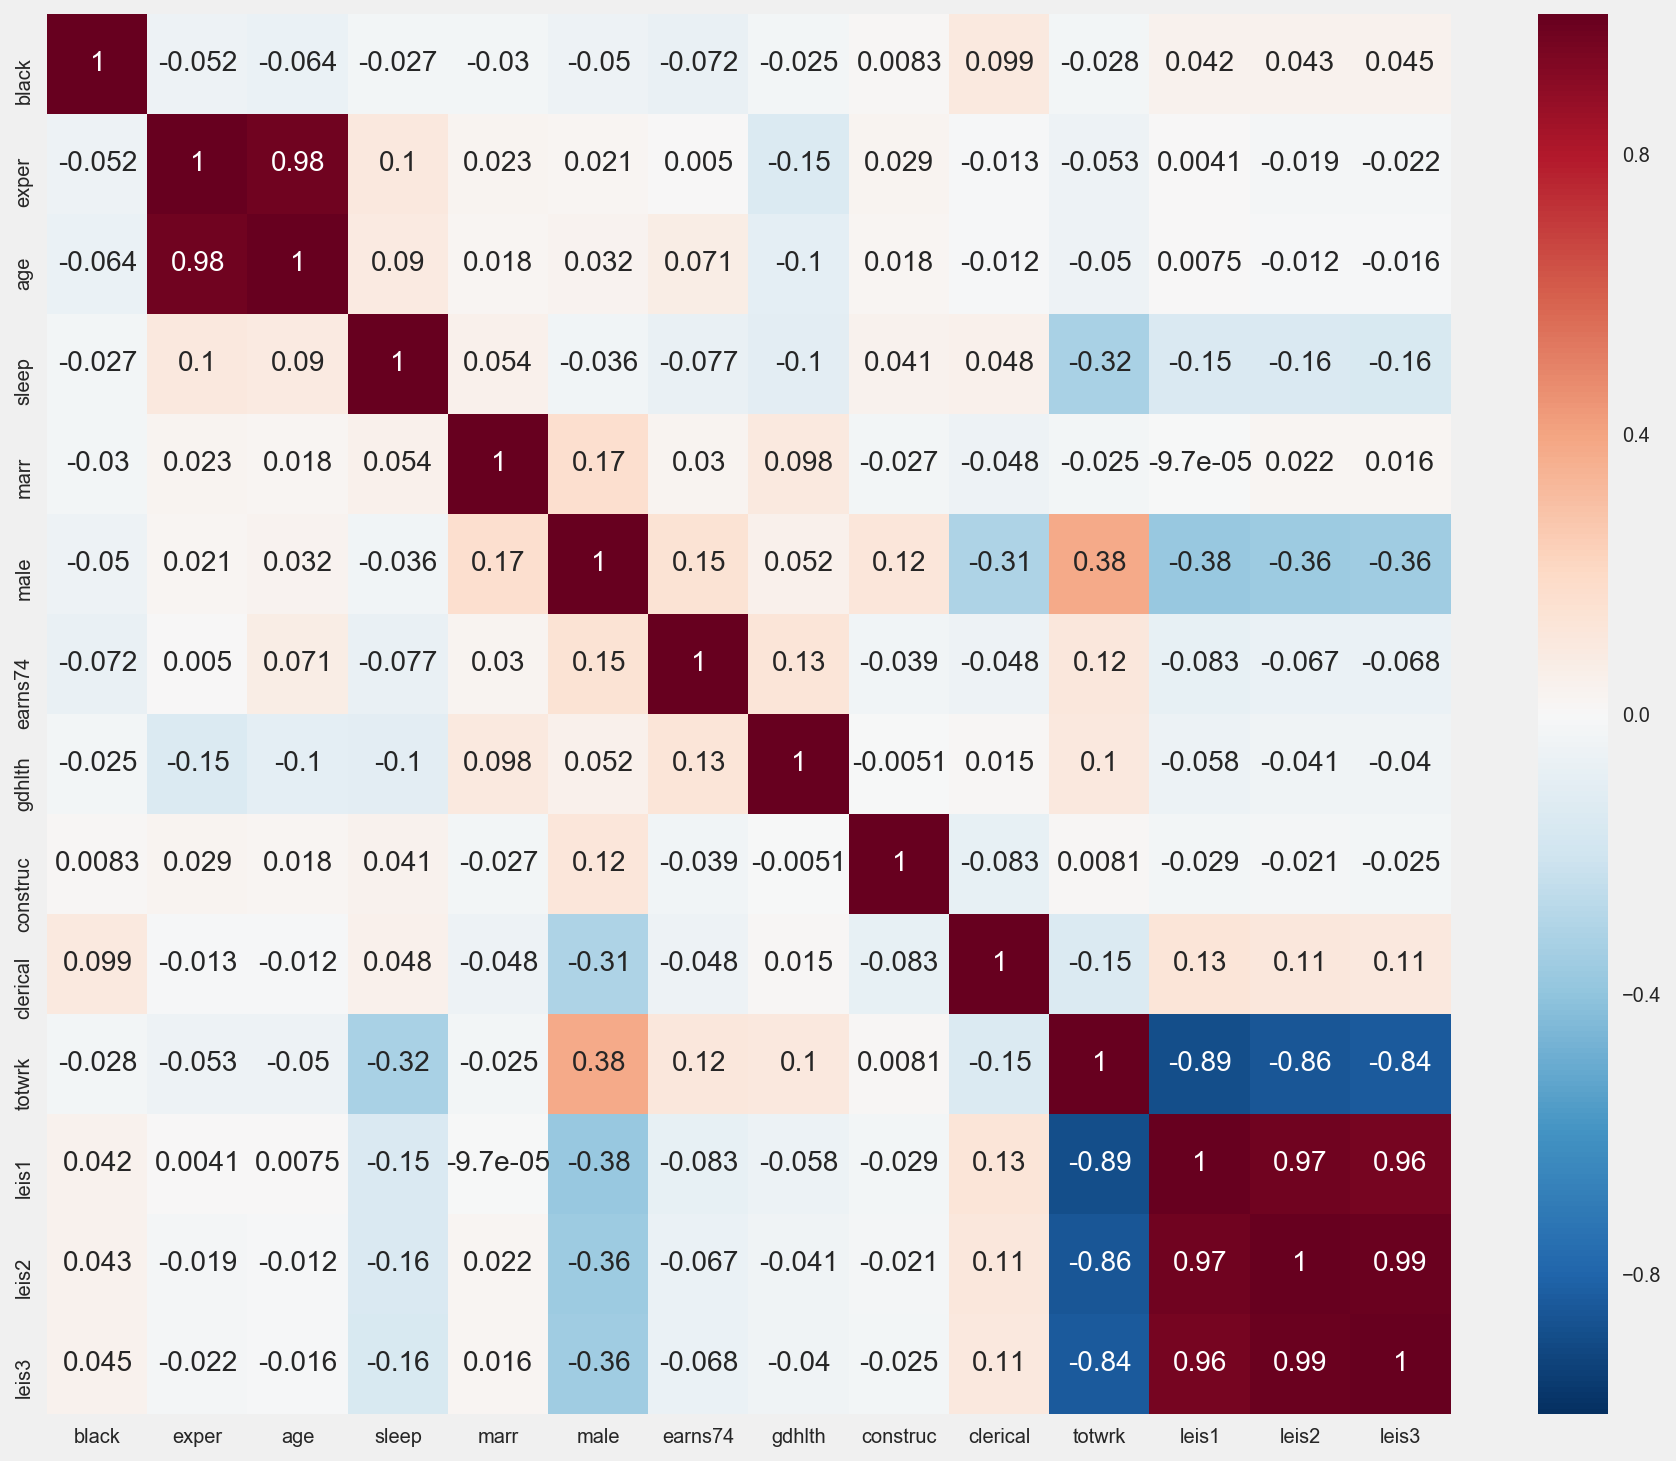

In [34]:
#Obtaining correlation matrix for fewer variables of interest rather than the entire variables in the data frame. Source: Class notebook
fig = plt.figure(figsize=(14,12))
ax = fig.gca()
sns.heatmap(JJ[['black', 'exper', 'age', 'sleep', 'marr','male','earns74','gdhlth', 'construc','clerical','totwrk','leis1','leis2','leis3']].corr(),annot=True, ax=ax)
plt.show()

## 4.1 Predictions
    Define y (mins sleep at night, per week)
    Define X (where X are your predictors => make sure to include the correct variables, i.e. exclude y, case, lothinc, and **other** variables)
    Standarized your Xs
    Train test split:
        splits your data into train test, 
        assigns a size of 30% to your test set, and use random_state=10
        print the shape of your train (X, y) and test (X, y)
---

In [35]:
JJ.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
age         706 non-null int64
black       706 non-null int64
case        706 non-null int64
clerical    706 non-null float64
construc    706 non-null float64
educ        706 non-null int64
earns74     706 non-null int64
gdhlth      706 non-null int64
inlf        706 non-null int64
leis1       706 non-null int64
leis2       706 non-null int64
leis3       706 non-null int64
smsa        706 non-null int64
lhrwage     706 non-null float64
lothinc     706 non-null float64
male        706 non-null int64
marr        706 non-null int64
prot        706 non-null int64
rlxall      706 non-null int64
selfe       706 non-null int64
sleep       706 non-null int64
slpnaps     706 non-null int64
south       706 non-null int64
spsepay     706 non-null int64
spwrk75     706 non-null int64
totwrk      706 non-null int64
union       706 non-null int64
worknrm     706 non-null int64
workscnd    706 non

In [36]:
#Models specifications, Source: MEGA Lab Solutions, class notes
X = JJ[['totwrk','educ','age','marr']]
y = JJ.sleep.values

In [37]:
#Normalization is carried out on the model, along with transformation of the fit. Source: Class note
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

Xn = ss.fit_transform(X)

In [38]:
#Accordingly, the dataset is split into train and test data as follows:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.3, random_state=10)
print X_train.shape, X_test.shape
print "\n======\n"
print y_train.shape, y_test.shape

(494, 4) (212, 4)


(494,) (212,)


/Users/jjonoja/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 4.2 Machine Learning models 
    OLS, Regularization methods and evaluate the performance of your models on the train and test datasets
    Cross validate at least 10 times the R^2 scores of your models and print the average R^2 scores 
    For the OLS implement an scatter plot that shows the relation between your predicted values and the y_test values (the actual values)
    
---

In [39]:
#OLS regression is now employed to test the model formulated, as follows: Source: Class Lab

from sklearn.linear_model import LinearRegression #Importing the relevant packages

lr = LinearRegression()  #The Linear reg model is generated

lr.fit(X_train, y_train)  #The model is now fitted accordingly

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
#The Model is further evaluated as follows:
from sklearn.metrics import r2_score  #Packages are installed to perform the evaluation
from sklearn.metrics import mean_squared_error

In [41]:
#The model predictions are generated, obtaining the MSE and R^2 on both test and trained data. Source: CLass note
def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    #This test is carried out on the trained and test 
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    
    #The MSE and R^2 are called accordingly
    print ('MSE ' + test + ' train data: %.3f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
    print('R^2 ' + test + ' train data: %.3f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))


## 4.2.1 OLS
    
---

In [43]:
#The OLS Model is now employed to obtain the estimate followuing evaluation that had been carried out above.
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "OLS", lr)

MSE OLS train data: 162058.200, test data: 203978.35
R^2 OLS train data: 0.136, test data: 0.07


## 4.2.2 Regularization
    
---

#### Regularization is carried out in order to correct for possible anormalies and inadequacies of OLS model. I use ridge, lasso and elastic net

In [44]:
#Import relevant packages for regularization as follows
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

##### Ridge Regularization

In [45]:
# Optimal level of alpha is first obtained, with the output printed afterwards. Source: Class Lab Solution notes
ridge_alphas = np.logspace(0, 5, 100)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)
print (optimal_ridge.alpha_)

52.14008288


In [46]:
# the model regression output is then generated and fitted for both test and trained data accordingly in this section as follows.
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge.fit(X_train, y_train)

Ridge(alpha=52.140082879996847, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [47]:
#The model is now evaluated, as was the case with OLS in the previous model.
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Ridge", ridge)

MSE Ridge train data: 162265.278, test data: 203412.50
R^2 Ridge train data: 0.135, test data: 0.07


#### Laso regularization

In [48]:
# As was the case with ridge, the step begins with obtaining the optimal alpha, achieved as follows:
optimal_lasso = LassoCV(n_alphas=300, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)
print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

9.88085700246


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished


In [49]:
#Haven obtained the optimal alpha, the Lasso Regression is now implimented, along with the model fit as follows:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso.fit(X_train, y_train)

Lasso(alpha=9.880857002458173, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
#Finally, the model is evaluated to obtain its prediction on both trained and test data.
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Lasso", lasso)

MSE Lasso train data: 162370.901, test data: 204189.74
R^2 Lasso train data: 0.134, test data: 0.07


#### Elastic Net Regularization

In [51]:
#Haven obtained the OLS, Ridge, and Laso, the elastic Net is finally obtained to compare with performance of the other models on both test and trained data
#Accordingly, the optimal alpha is obtained, with the output printed, as well as its ratio. Model & code Source: Class Lab Notes

l1_ratios = np.linspace(0.01, 1.0, 50)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5, verbose=1)
optimal_enet.fit(X_train, y_train)
print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

10.5899753351
1.0


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   20.4s finished


In [52]:
# Enet is generated for the Elastic net regression, as well as fitting the model 
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet.fit(X_train, y_train)

ElasticNet(alpha=10.589975335056982, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [53]:
#As was the case with the previous models, Elatic net is evaluated to obtain its predictive power and estimates
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Elastic Net", enet)

MSE Elastic Net train data: 162417.394, test data: 204225.88
R^2 Elastic Net train data: 0.134, test data: 0.07


## 4.2.3 What are the features that are the best predictors of mins sleep at night, per week
    What are the features with coefficients greater than 0
---

In [56]:
#To obtain the features that best predicts sleep at night per night, OLS which is the best estimator is employed again to determine this.
#The predictions, coefficients, R^2 obtained from the model are all printed accordingly
Best_Estimator = lr.fit(X, y)

predictions = lr.predict(X)
print predictions.shape

print "R^2:", Best_Estimator.score(X, y)
print "Coefficients:", Best_Estimator.coef_
print "Intercept:", lr.intercept_

 (706,)
R^2: 0.115176507398
Coefficients: [ -0.14789912 -10.93144017   2.18574342  49.42013646]
Intercept: 3594.60074813


In [58]:
## Log Credit to variables to normalize distributions and also provide consistent unit of measurement in elasticity
JJ['log_sleep'] = JJ.sleep.apply(np.log)
JJ['log_educ'] = JJ.educ.apply(np.log)
JJ['log_age'] = JJ.age.apply(np.log)
JJ['log_totwrk'] = JJ.age.apply(np.log)

In [59]:
#Models specifications, Source: MEGA Lab Solutions, class notes
X2 = JJ[['log_totwrk','log_educ','log_age','marr']]
y2 = JJ.log_sleep.values

In [60]:
Best_Estimator = lr.fit(X2, y2)

predictions = lr.predict(X2)
print predictions.shape

print "R^2:", Best_Estimator.score(X2, y2)
print "Coefficients:", Best_Estimator.coef_
print "Intercept:", lr.intercept_

(706,)
R^2: 0.0160482939467
Coefficients: [ 0.01656081 -0.04409452  0.01656081  0.02264515]
Intercept: 8.05372141973


#### From the model, it follows that the age has the most significant impact on sleep. Increase in age reduces the percentage number of minutes of sleep per night by 0.04. Hence, the older one becomes, the less minutes of sleep would be obtainable per night. converting the variables means that there's a common basis for comparing their respective impacts on sleep. 

## 4.2.3.1 Bonus
    Define a function that creates and prints the distribution of residuals on the train and test data from all the methods
---

In [63]:
## To obtain the residuals and plot accordingly, the process begins with fitting them. Source: Class Lab notes
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
enet.fit(X_train, y_train)
lasso.fit(X_train, y_train)

Lasso(alpha=9.880857002458173, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [64]:
# The residulas are then obtained:
lr_resid = y_test - lr.predict(X_test)
ridge_resid = y_test - ridge.predict(X_test)
lasso_resid = y_test - lasso.predict(X_test)
enet_resid = y_test - enet.predict(X_test)

In [67]:
sns.set_style('darkgrid')


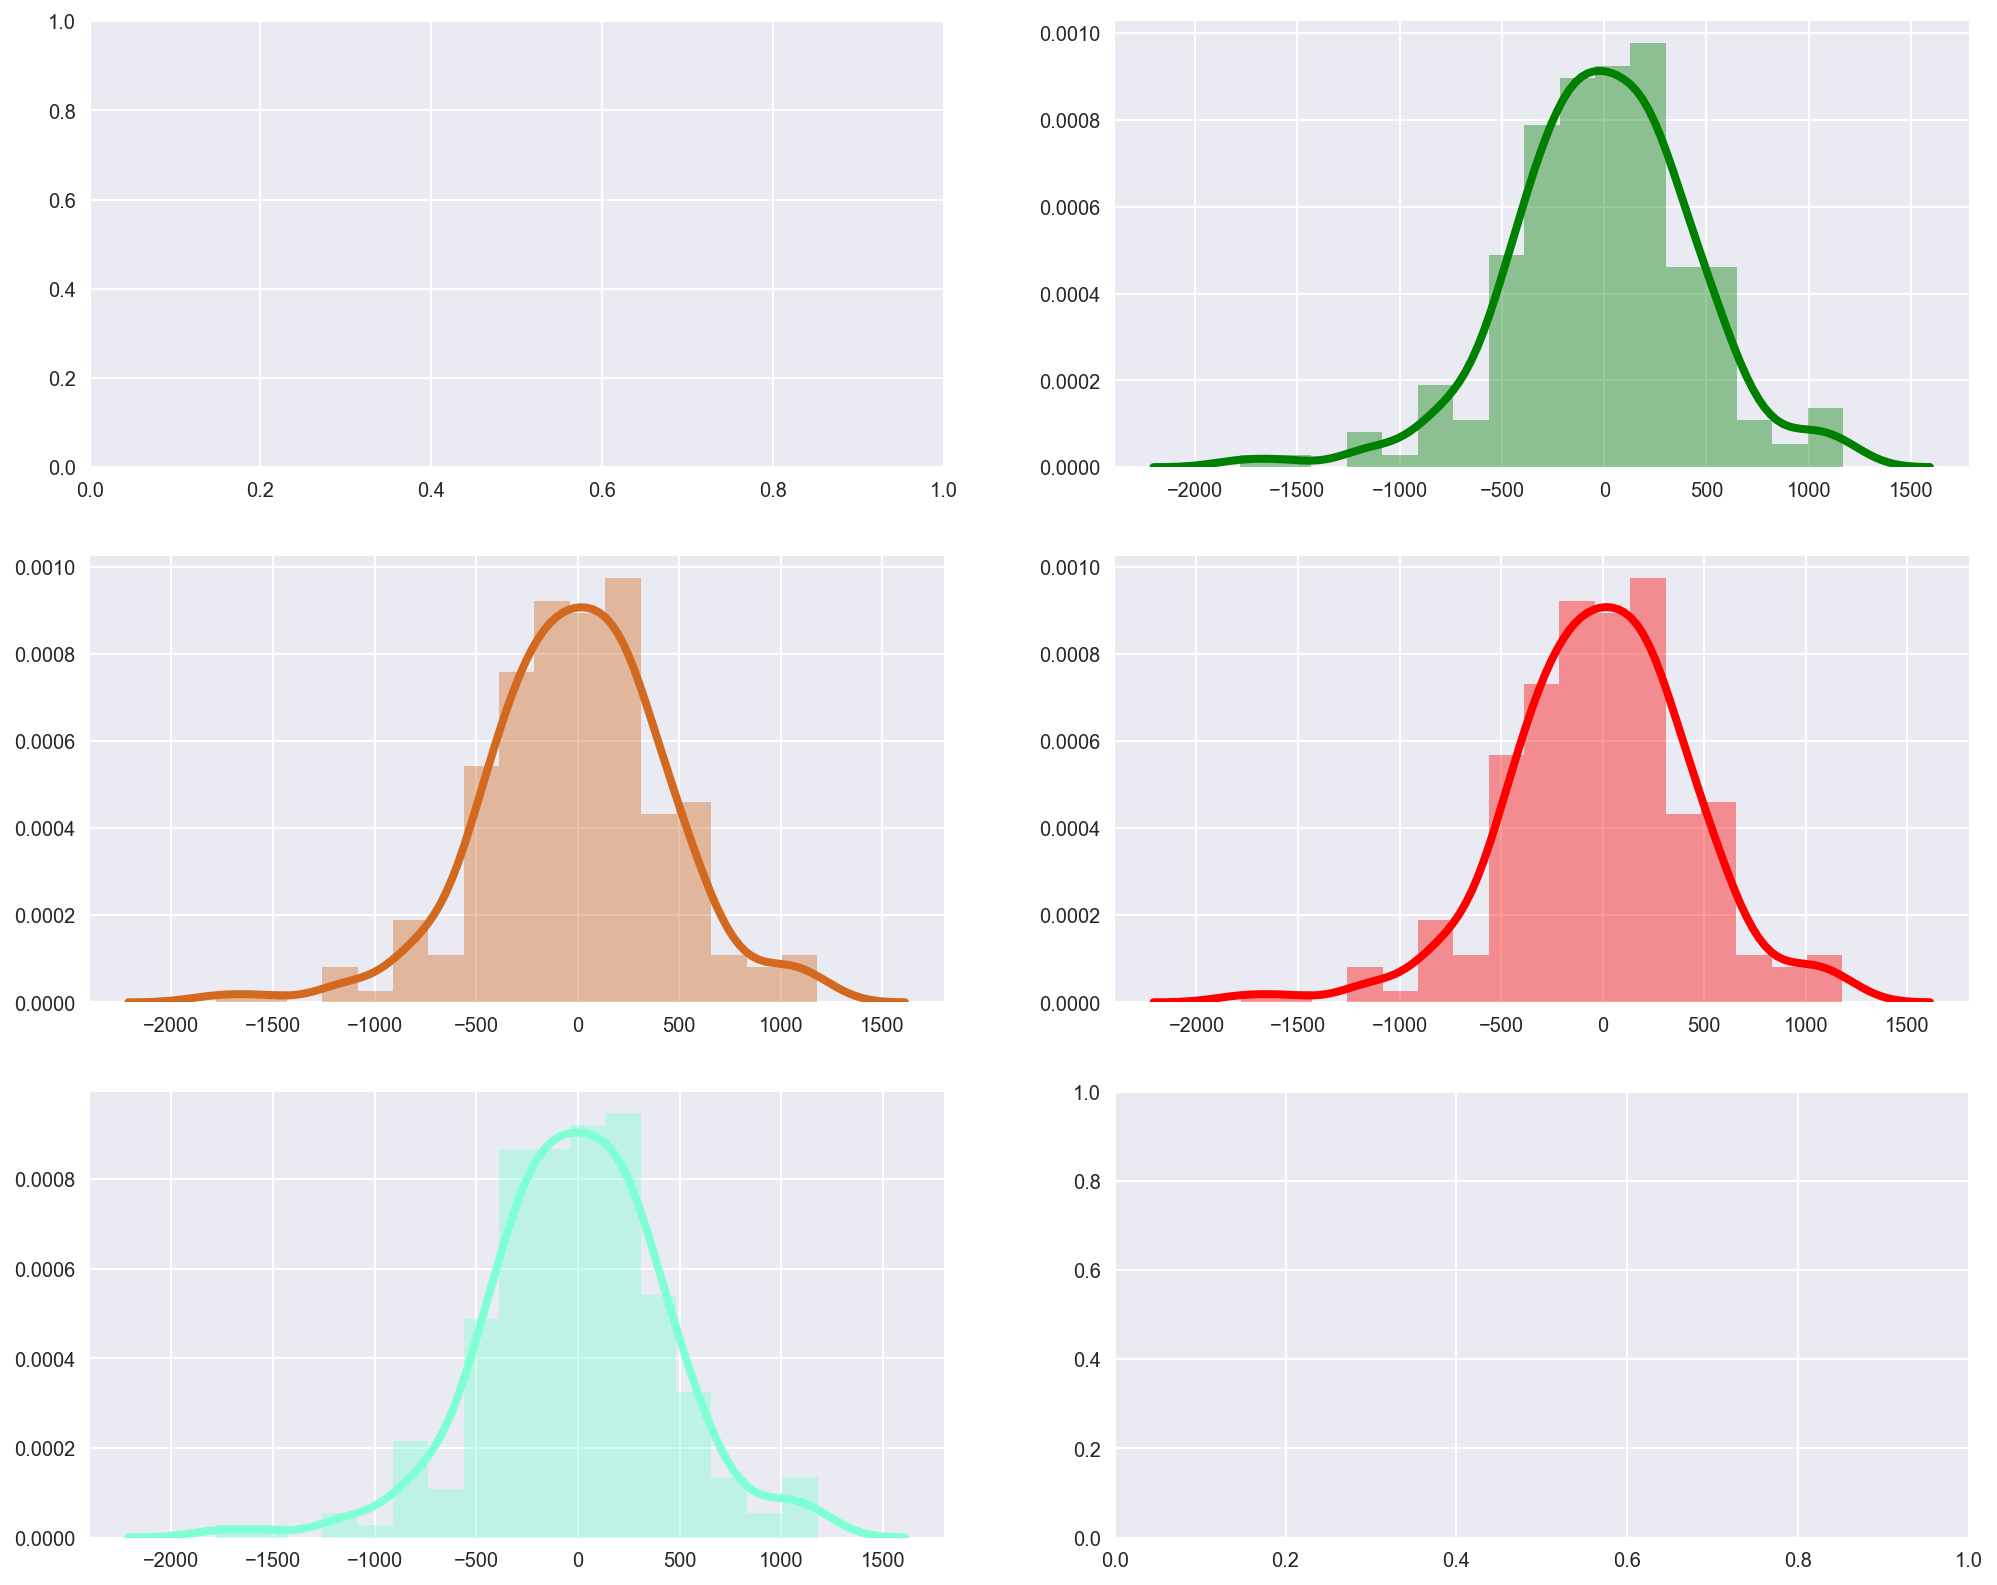

In [75]:
#The plots are now generated as follows:

fig, axarr = plt.subplots(3, 2, figsize=(15,13),
                         sharex=False, sharey=False)

axarr[0,1] = sns.distplot(ridge_resid ,ax=axarr[0,1], color='green')       
                          
axarr[1,0] = sns.distplot(lasso_resid, ax=axarr[1,0], color='chocolate')

axarr[1,1] = sns.distplot(enet_resid, ax=axarr[1,1], color='red')

axarr[2,0] = sns.distplot(lr_resid, ax=axarr[2,0], color='aquamarine')

plt.show()

#### All the distributions in the residuals are normalized.

## 4.2.4 Regression Tree 
    Gridsearch your tree
    Print the best parameters and best score from your gridsearch.
    Evaluate the performance of your tree
    Print the features that best explain your Y, are these features the same as the features you found before from the regularization methods or OLS
    
    OPTIONAL: Visualize the tree ONLY if your computer lets you do it. Your grade won't be penalized for not printing the tree, nor you will receive extra points for visualization the tree
---

In [76]:
#Relevant packages are imported to implement the regression tree. The grid search is also generated. Source: Class Lab notes
#Cross validaton is carried out accordingly

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)

/Users/jjonoja/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [77]:
## The model is fitted as follows
dtr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [78]:
#The best estimator is printed after evaluating the model, along with the parameter scores

dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=7, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': None, 'min_samples_split': 2, 'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 7}


best score 0.0907822120462


In [79]:
# Y variable is best estimated following features of the model. Source: Class Lab note
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance

In [80]:
#The feature is now printed to determine its performance
feature_importance(X, dtr_best)

,feature,importance
0,totwrk,0.823066
1,educ,0.120405
2,age,0.056529
3,marr,0.000000


In [81]:
## Prediction is obtained from the model
y_pred_dtr= dtr_best.predict(X_test)
y_pred_dtr

array([ 3169.3875    ,  3169.3875    ,  3356.45      ,  3520.8372093 ,
        3520.8372093 ,  3169.3875    ,  3356.45      ,  3356.45      ,
        3169.3875    ,  3356.45      ,  2653.15384615,  3169.3875    ,
        3356.45      ,  3169.3875    ,  3356.45      ,  3520.8372093 ,
        3169.3875    ,  3356.45      ,  3356.45      ,  3356.45      ,
        3169.3875    ,  3169.3875    ,  3169.3875    ,  3356.45      ,
        3169.3875    ,  3169.3875    ,  3169.3875    ,  3169.3875    ,
        3169.3875    ,  3520.8372093 ,  3169.3875    ,  3356.45      ,
        3169.3875    ,  3356.45      ,  3169.3875    ,  3356.45      ,
        3356.45      ,  3169.3875    ,  3169.3875    ,  3356.45      ,
        3356.45      ,  3356.45      ,  3169.3875    ,  3169.3875    ,
        3169.3875    ,  3169.3875    ,  3520.8372093 ,  2653.15384615,
        3356.45      ,  3169.3875    ,  3520.8372093 ,  3356.45      ,
        3169.3875    ,  3356.45      ,  3169.3875    ,  3356.45      ,
      

In [82]:
#The visuals is generated 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

ImportError: No module named pydot

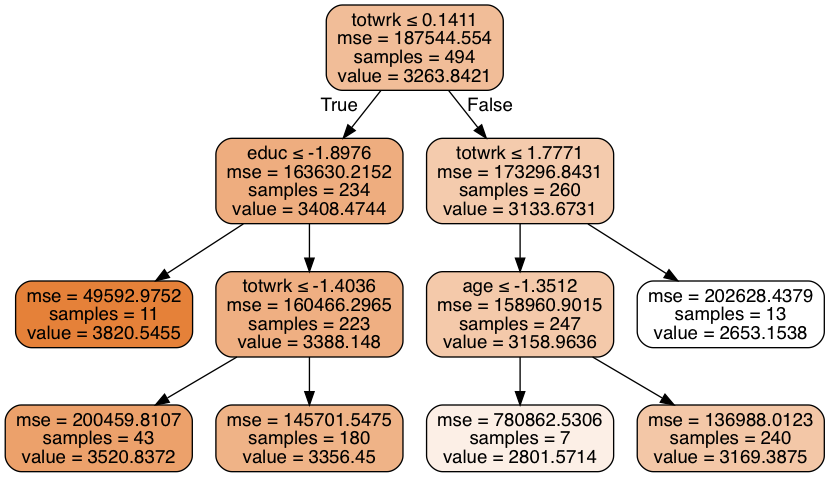

In [83]:
#The graphs and visuals is obtained
dot_data = StringIO()

export_graphviz(dtr_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

## 4.2.5 Random Forest Regression Tree
    Make sure you gridsearch your Random Forest
    Evaluate the performance
    Print the features that best explain mins sleep at night, per week 
---



## 5. Based on the MSE and R^2, in your opinion which model perform best and why?
---

### Based on the R^2 and MSE, the OLS performs better than Laso, Ridge, reg tree and Elastic net. it has 

## 6. Was there any trade off between bias and variance whem implementing the models?
    
---

ANS: NO

## 7. Explain the Bias Variance trade in the model you selected?
    
---

ANS: